In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_excel('Xiaomi India (1).xlsx')
df.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668.0
1,2,Saturday,Chrome,15,5,16.9,3469.0
2,3,Monday,Internet Explorer,20,6,7.3,5215.0
3,4,Monday,Chrome,42,6,30.1,10423.0
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0


In [3]:
# Checking for null values
print(df.shape)
df.isnull().sum()

(43200, 7)


Customer              0
Day                   0
Browser               0
No. of Clicks         0
Pages Viewed          0
Time (min)            0
Amount Spent (Rs.)    0
dtype: int64

In [4]:
# Drop not required columns
# In this case it is 'Customer'
df = df.drop(['Customer'], axis=1)
df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,Monday,Chrome,13,4,8.5,2668.0
1,Saturday,Chrome,15,5,16.9,3469.0
2,Monday,Internet Explorer,20,6,7.3,5215.0
3,Monday,Chrome,42,6,30.1,10423.0
4,Saturday,Internet Explorer,20,6,13.3,5404.0


In [5]:
# Checking for Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 6 columns):
Day                   43200 non-null object
Browser               43200 non-null object
No. of Clicks         43200 non-null int64
Pages Viewed          43200 non-null int64
Time (min)            43200 non-null float64
Amount Spent (Rs.)    43200 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ MB


In [6]:
# Converting non-numeric data into numeric by using label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Day'] = encoder.fit_transform(df['Day'])
df['Browser'] = encoder.fit_transform(df['Browser'])
df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,0,13,4,8.5,2668.0
1,2,0,15,5,16.9,3469.0
2,1,2,20,6,7.3,5215.0
3,1,0,42,6,30.1,10423.0
4,2,2,20,6,13.3,5404.0


In [7]:
# Checking for datatypes after label encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 6 columns):
Day                   43200 non-null int32
Browser               43200 non-null int32
No. of Clicks         43200 non-null int64
Pages Viewed          43200 non-null int64
Time (min)            43200 non-null float64
Amount Spent (Rs.)    43200 non-null float64
dtypes: float64(2), int32(2), int64(2)
memory usage: 1.6 MB


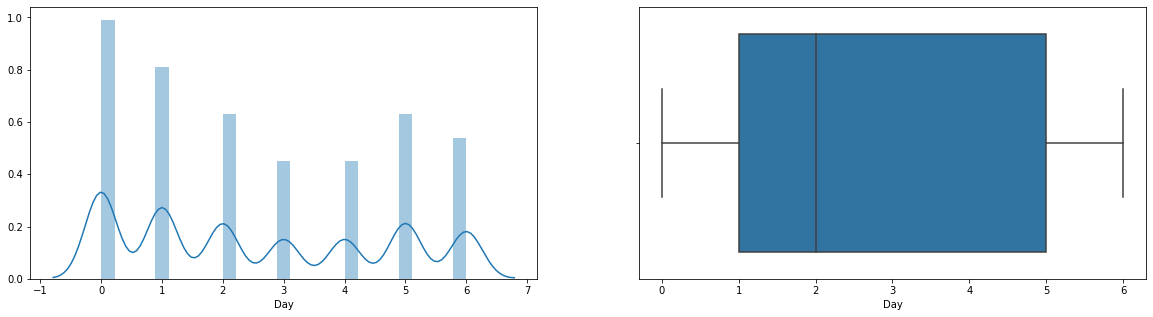

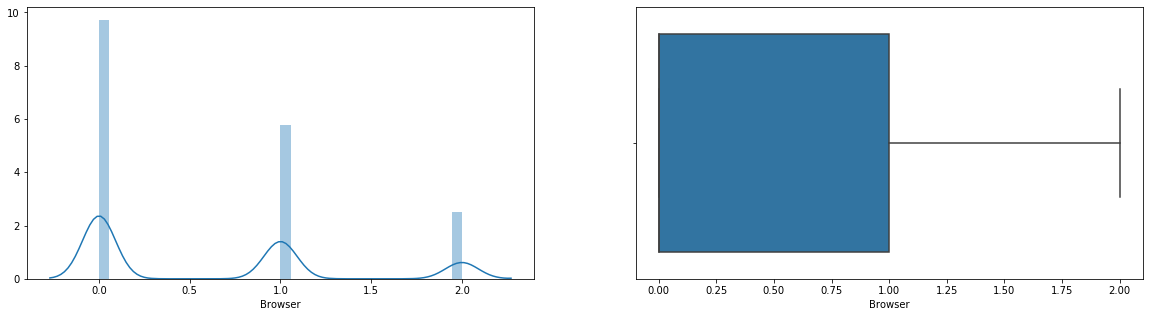

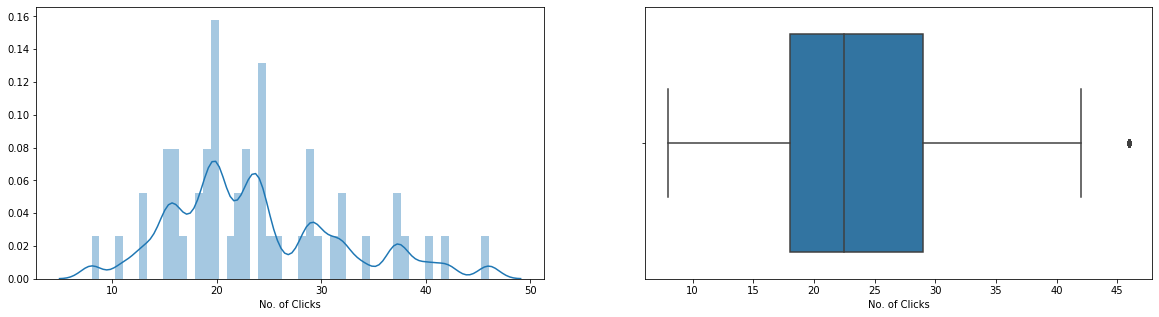

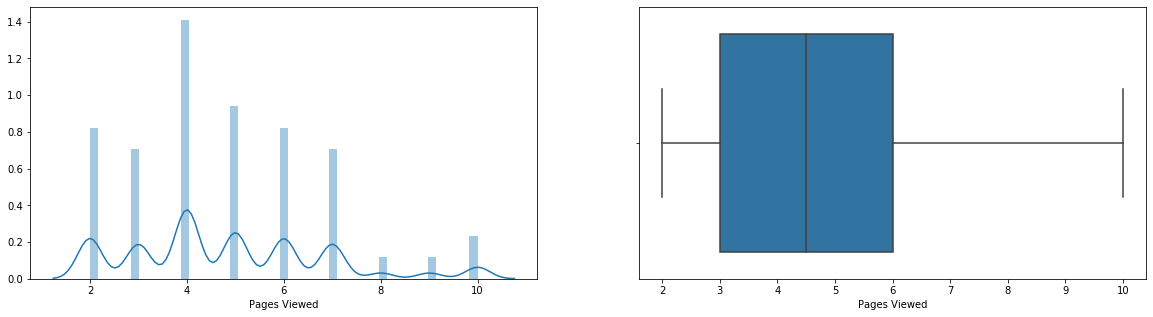

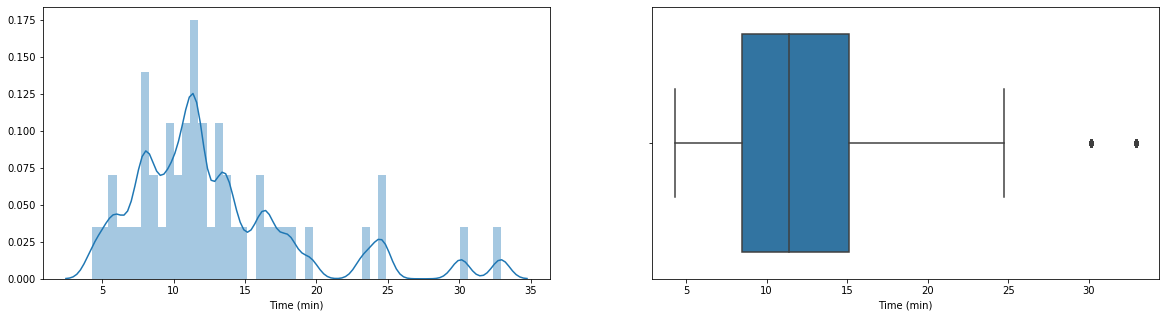

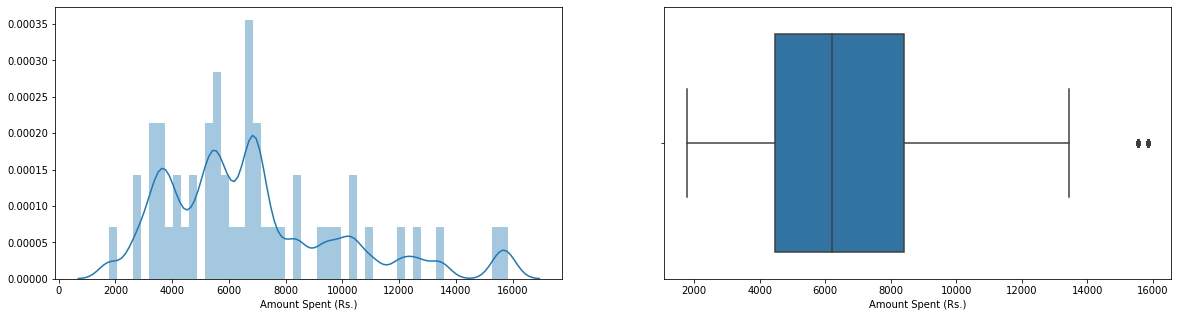

In [8]:
# Checking for outliers by using histogram and boxplot
for i in df:
    data = df[i]
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.distplot(data)
    plt.subplot(1,2,2)
    sns.boxplot(data)
    plt.show()


In [9]:
# Separating independent variable and target variables

X = df[df.columns.difference(['Amount Spent (Rs.)'])]
y = df['Amount Spent (Rs.)']

In [10]:
# Train-Test-Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(30240, 5) (12960, 5)
(30240,) (12960,)


In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
predict_train = lr.predict(X_train)
predict_test = lr.predict(X_test)

#### Explained variance score
This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect. 

#### Median absolute error
This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.

#### Mean absolute error
This is the average of absolute errors of all the datapoints in the given dataset.

#### Mean squared error
This is the average of the squares of the errors of all the datapoints in the given dataset. It is one of the most popular metrics out there!

#### R2 score
This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, and the values can be negative as well.


In [13]:
# Importing Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score
from math import sqrt

print("For Training\n")
print("R2 Square: %.4f" %r2_score(y_train,predict_train))
print("Root Mean Squared Error: %.4f" %sqrt(mean_squared_error(y_train,predict_train)))
print("Mean Absolute Error: %.4f" %mean_absolute_error(y_train,predict_train))
print("Median Absolute Error: %4f" %median_absolute_error(y_train,predict_train))
print("Explained Variance Score: %4f" %explained_variance_score(y_train,predict_train))

print("\nFor Testing\n")
print("R2 Square: %.4f" %r2_score(y_test,predict_test))
print("Root Mean Squared Error: %.4f" %sqrt(mean_squared_error(y_test,predict_test)))
print("Mean Absolute Error: %.4f" %mean_absolute_error(y_test,predict_test))
print("Median Absolute Error: %4f" %median_absolute_error(y_test,predict_test))
print("Explained Variance Score: %4f" %explained_variance_score(y_test, predict_test))

For Training

R2 Square: 0.8876
Root Mean Squared Error: 1074.3093
Mean Absolute Error: 811.0537
Median Absolute Error: 695.443042
Explained Variance Score: 0.887574

For Testing

R2 Square: 0.8856
Root Mean Squared Error: 1081.2583
Mean Absolute Error: 814.3292
Median Absolute Error: 704.558460
Explained Variance Score: 0.885603


### Polynomial Regression (Degrees = 2)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=2) 

X_train_transformed = polynomial.fit_transform(X_train)
X_test_transformed = polynomial.fit_transform(X_test)


poly_linear_model = LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)
predict_train = poly_linear_model.predict(X_train_transformed)
predict_test = poly_linear_model.predict(X_test_transformed)

print("For Training\n")
print("R2 Square: %.4f" %r2_score(y_train,predict_train))
print("Root Mean Squared Error: %.4f" %sqrt(mean_squared_error(y_train,predict_train)))
print("Mean Absolute Error: %.4f" %mean_absolute_error(y_train,predict_train))
print("Median Absolute Error: %4f" %median_absolute_error(y_train,predict_train))
print("Explained Variance Score: %4f" %explained_variance_score(y_train,predict_train))

print("\nFor Testing\n")
print("R2 Square: %.4f" %r2_score(y_test,predict_test))
print("Root Mean Squared Error: %.4f" %sqrt(mean_squared_error(y_test,predict_test)))
print("Mean Absolute Error: %.4f" %mean_absolute_error(y_test,predict_test))
print("Median Absolute Error: %4f" %median_absolute_error(y_test,predict_test))
print("Explained Variance Score: %4f" %explained_variance_score(y_test, predict_test))

For Training

R2 Square: 0.9723
Root Mean Squared Error: 532.8808
Mean Absolute Error: 424.1256
Median Absolute Error: 324.817743
Explained Variance Score: 0.972339

For Testing

R2 Square: 0.9720
Root Mean Squared Error: 534.4572
Mean Absolute Error: 426.3405
Median Absolute Error: 351.636016
Explained Variance Score: 0.972052


### Polynomial Regression (Degrees = 3)

In [15]:
polynomial = PolynomialFeatures(degree=3) 

X_train_transformed = polynomial.fit_transform(X_train)
X_test_transformed = polynomial.fit_transform(X_test)


poly_linear_model = LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)
predict_train = poly_linear_model.predict(X_train_transformed)
predict_test = poly_linear_model.predict(X_test_transformed)

print("For Training\n")
print("R2 Square: %.4f" %r2_score(y_train,predict_train))
print("Root Mean Squared Error: %.4f" %sqrt(mean_squared_error(y_train,predict_train)))
print("Mean Absolute Error: %.4f" %mean_absolute_error(y_train,predict_train))
print("Median Absolute Error: %4f" %median_absolute_error(y_train,predict_train))
print("Explained Variance Score: %4f" %explained_variance_score(y_train,predict_train))

print("\nFor Testing\n")
print("R2 Square: %.4f" %r2_score(y_test,predict_test))
print("Root Mean Squared Error: %.4f" %sqrt(mean_squared_error(y_test,predict_test)))
print("Mean Absolute Error: %.4f" %mean_absolute_error(y_test,predict_test))
print("Median Absolute Error: %4f" %median_absolute_error(y_test,predict_test))
print("Explained Variance Score: %4f" %explained_variance_score(y_test, predict_test))

For Training

R2 Square: 1.0000
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
Median Absolute Error: 0.000000
Explained Variance Score: 1.000000

For Testing

R2 Square: 1.0000
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
Median Absolute Error: 0.000000
Explained Variance Score: 1.000000


### Lasso Regression

Ordinary least squares considers every single datapoint when it's building the model. Hence, the actual model ends up looking like the dotted line as shown in the preceding figure. We can clearly see that this model is suboptimal. To avoid this, we use regularization where a penalty is imposed on the size of the coefficients

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train,y_train)
predict_train = lasso.predict(X_train)
predict_test = lasso.predict(X_test)

print("For Training\n")
print("R2 Square: %.4f" %r2_score(y_train,predict_train))
print("Root Mean Squared Error: %.4f" %sqrt(mean_squared_error(y_train,predict_train)))
print("Mean Absolute Error: %.4f" %mean_absolute_error(y_train,predict_train))
print("Median Absolute Error: %4f" %median_absolute_error(y_train,predict_train))
print("Explained Variance Score: %4f" %explained_variance_score(y_train,predict_train))

print("\nFor Testing\n")
print("R2 Square: %.4f" %r2_score(y_test,predict_test))
print("Root Mean Squared Error: %.4f" %sqrt(mean_squared_error(y_test,predict_test)))
print("Mean Absolute Error: %.4f" %mean_absolute_error(y_test,predict_test))
print("Median Absolute Error: %4f" %median_absolute_error(y_test,predict_test))
print("Explained Variance Score: %4f" %explained_variance_score(y_test, predict_test))

For Training

R2 Square: 0.8876
Root Mean Squared Error: 1074.3093
Mean Absolute Error: 811.0441
Median Absolute Error: 695.383308
Explained Variance Score: 0.887574

For Testing

R2 Square: 0.8856
Root Mean Squared Error: 1081.2582
Mean Absolute Error: 814.3179
Median Absolute Error: 704.346745
Explained Variance Score: 0.885603


### Ridge Regression

Ordinary least squares considers every single datapoint when it's building the model. Hence, the actual model ends up looking like the dotted line as shown in the preceding figure. We can clearly see that this model is suboptimal. To avoid this, we use regularization where a penalty is imposed on the size of the coefficients.

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, max_iter=10000)
# The alpha parameter controls the complexity. 
# As alpha gets closer to 0, the ridge regressor tends to become more like a linear regressor with ordinary least squares.
# So, if you want to make it robust against outliers, you need to assign a higher value  to alpha.
# We considered a value of 0.01, which is moderate.

ridge.fit(X_train,y_train)
predict_train = ridge.predict(X_train)
predict_test = ridge.predict(X_test)

print("For Training\n")
print("R2 Square: %.4f" %r2_score(y_train,predict_train))
print("Root Mean Squared Error: %.4f" %sqrt(mean_squared_error(y_train,predict_train)))
print("Mean Absolute Error: %.4f" %mean_absolute_error(y_train,predict_train))
print("Median Absolute Error: %4f" %median_absolute_error(y_train,predict_train))
print("Explained Variance Score: %4f" %explained_variance_score(y_train,predict_train))

print("\nFor Testing\n")
print("R2 Square: %.4f" %r2_score(y_test,predict_test))
print("Root Mean Squared Error: %.4f" %sqrt(mean_squared_error(y_test,predict_test)))
print("Mean Absolute Error: %.4f" %mean_absolute_error(y_test,predict_test))
print("Median Absolute Error: %4f" %median_absolute_error(y_test,predict_test))
print("Explained Variance Score: %4f" %explained_variance_score(y_test, predict_test))

For Training

R2 Square: 0.8876
Root Mean Squared Error: 1074.3093
Mean Absolute Error: 811.0551
Median Absolute Error: 695.437544
Explained Variance Score: 0.887574

For Testing

R2 Square: 0.8856
Root Mean Squared Error: 1081.2583
Mean Absolute Error: 814.3305
Median Absolute Error: 704.555952
Explained Variance Score: 0.885603


### SVR

In [18]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)
predict_train = svr.predict(X_train)
predict_test = svr.predict(X_test)

print("For Training\n")
print("R2 Square: %.4f" %r2_score(y_train,predict_train))
print("Root Mean Squared Error: %.4f" %sqrt(mean_squared_error(y_train,predict_train)))
print("Mean Absolute Error: %.4f" %mean_absolute_error(y_train,predict_train))
print("Median Absolute Error: %f" %median_absolute_error(y_train,predict_train))
print("Explained Variance Score: %4f" %explained_variance_score(y_train,predict_train))

print("\nFor Testing\n")
print("R2 Square: %.4f" %r2_score(y_test,predict_test))
print("Root Mean Squared Error: %.4f" %sqrt(mean_squared_error(y_test,predict_test)))
print("Mean Absolute Error: %.4f" %mean_absolute_error(y_test,predict_test))
print("Median Absolute Error: %f" %median_absolute_error(y_test,predict_test))
print("Explained Variance Score: %4f" %explained_variance_score(y_test, predict_test))

For Training

R2 Square: 0.6190
Root Mean Squared Error: 1977.7932
Mean Absolute Error: 1195.6216
Median Absolute Error: 675.025547
Explained Variance Score: 0.642301

For Testing

R2 Square: 0.6152
Root Mean Squared Error: 1983.0965
Mean Absolute Error: 1198.9623
Median Absolute Error: 654.350389
Explained Variance Score: 0.639197
